In [293]:
import pandas as pd

data_path = '../data/VL_csv/tn_travel_여행_E_COST.csv'

df = pd.read_csv(data_path)
print(df.shape)

df.head(3).T

(2560, 14)


,0,1,2
TRAVEL_ID,e_e000004,e_e000006,e_e000009
TRAVEL_NM,E03,E03,E03
TRAVELER_ID,e000004,e000006,e000009
TRAVEL_PURPOSE,3,21,2;4
TRAVEL_START_YMD,2023-04-30,2023-04-30,2023-04-29
TRAVEL_END_YMD,2023-05-01,2023-05-02,2023-05-01
MVMN_NM,NaN,NaN,NaN
TRAVEL_PERSONA,서울 외 수도권 방문/수도권 거주/40세 이상/자녀동반/일반미션,경기 방문/거주지 구분 없음/39세 이하/특별미션,서울 외 수도권 방문/수도권 거주/39세 이하/커플/일반미션
TRAVEL_MISSION,3,21,2;4
TRAVEL_MISSION_CHECK,3;4;11,21;10;27,22;1;7


In [294]:
df['MVMN_NM'].value_counts()

MVMN_NM
자가용       1222
대중교통 등    1022
Name: count, dtype: int64

In [295]:
df.fillna({'MVMN_NM': '기타'}, inplace=True)
df['MVMN_NM'] = df['MVMN_NM'].replace('대중교통 등', '대중교통')
df['MVMN_NM'].value_counts()

MVMN_NM
자가용     1222
대중교통    1022
기타       316
Name: count, dtype: int64

### 페르소나 전처리

In [296]:
where = []
country = []
age = []
whowith = []
mission = []


for i, row in df.iterrows():
    tmp = row['TRAVEL_PERSONA'].split('/')
    if tmp[-1] == '특별미션':
        where.append(tmp[0])
        country.append(tmp[1])
        age.append(tmp[2])
        whowith.append(tmp[-1])
        mission.append(tmp[-1])
    else:
        where.append(tmp[0])
        country.append(tmp[1])
        age.append(tmp[2])
        whowith.append(tmp[3])
        mission.append(tmp[-1])

In [297]:
df['where'] = where
df['country'] = country
df['age'] = age
df['whowith'] = whowith
df['mission'] = mission

In [298]:
df['where'].value_counts()

where
서울 외 수도권 방문    1306
서울 방문           791
경기 방문           412
인천 방문            51
Name: count, dtype: int64

In [299]:
df['country'].value_counts()

country
수도권 거주       1614
거주지 구분 없음     663
수도권 외 거주      283
Name: count, dtype: int64

In [300]:
df['age'].value_counts()

age
39세 이하    1936
40세 이상     624
Name: count, dtype: int64

In [301]:
df['whowith'].value_counts()

whowith
커플          668
특별미션        663
나홀로 여행      402
자녀동반        361
부부          195
3인 이상 친구    189
부모 동반        49
3대 동반 여행     33
Name: count, dtype: int64

In [302]:
df['mission'].value_counts()

mission
일반미션    1897
특별미션     663
Name: count, dtype: int64

### Travel_mission_check 전처리

- 무조건 3개씩 고름

In [303]:
df['TRAVEL_MISSION_CHECK'].apply(lambda x: len(x.split(';'))).value_counts()

TRAVEL_MISSION_CHECK
3    2560
Name: count, dtype: int64

In [304]:
df['TRAVEL_MISSION_CHECK'].apply(lambda x: x.split(';')).value_counts()

TRAVEL_MISSION_CHECK
[1, 22, 26]    33
[6, 1, 4]      29
[6, 22, 1]     28
[6, 1, 22]     21
[6, 22, 26]    21
               ..
[2, 7, 6]       1
[8, 24, 1]      1
[24, 21, 4]     1
[23, 1, 6]      1
[22, 5, 26]     1
Name: count, Length: 1236, dtype: int64

In [305]:
df['TRAVEL_MISSION'] = df['TRAVEL_MISSION'].apply(lambda x: x.split(';')[0]) # Mission은 한개만

In [306]:
df['TRAVEL_MISSION_CHECK'] = df['TRAVEL_MISSION_CHECK'].apply(lambda x: x.split(';'))

In [307]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mission_matrix = mlb.fit_transform(df['TRAVEL_MISSION_CHECK'])

#### 페르소나 특징 확인
- 특별여행과 일반여행의 차이점 비교할 것

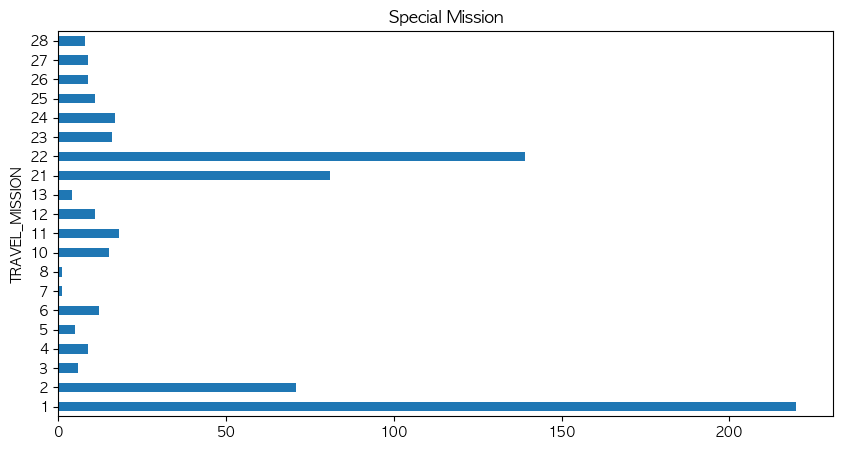

In [308]:
df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts().sort_index(ascending=True).plot(kind='barh', figsize=(10, 5), title='Special Mission');

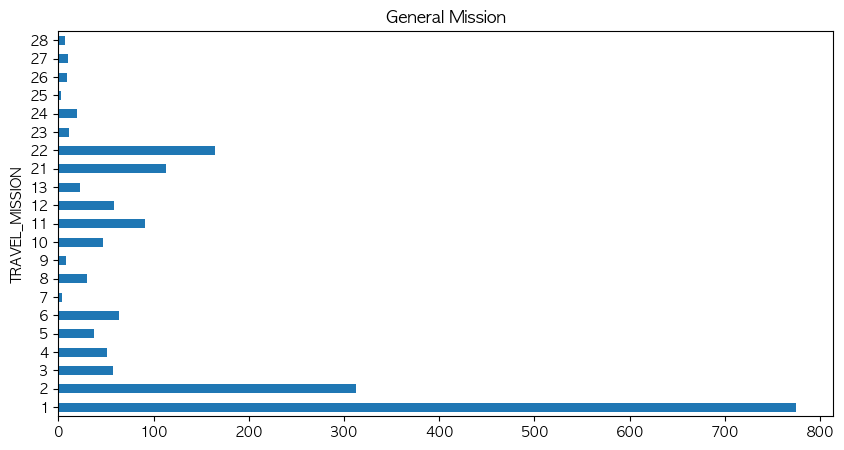

In [309]:
df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts().sort_index(ascending=True).plot(kind='barh', figsize=(10, 5), title='General Mission');

In [310]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

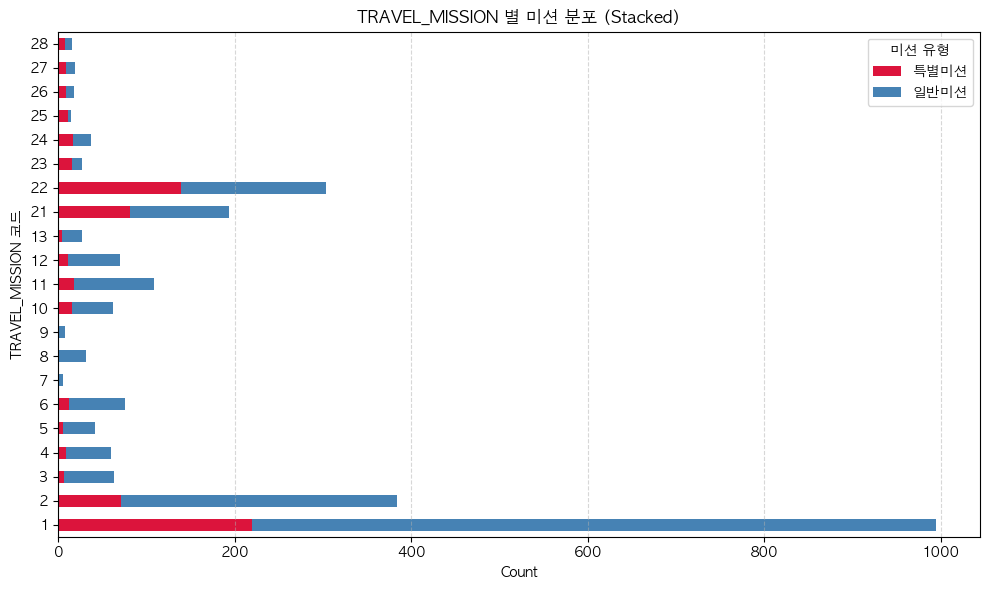

In [311]:
# 1. 미션별 카운트
special = df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts()
general = df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts()

# 2. 두 시리즈를 병합
mission_df = pd.DataFrame({
    '특별미션': special,
    '일반미션': general
}).fillna(0).astype(int).sort_index()

# 3. 막대 그래프
mission_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['crimson', 'steelblue'])

plt.title("TRAVEL_MISSION 별 미션 분포 (Stacked)")
plt.xlabel("Count")
plt.ylabel("TRAVEL_MISSION 코드")
plt.legend(title="미션 유형")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

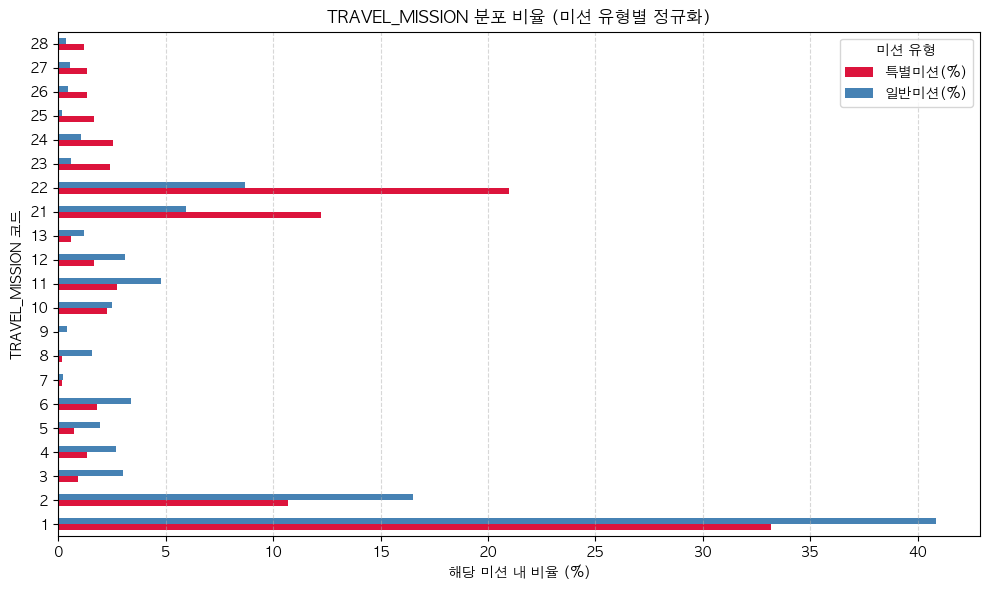

In [312]:
# 1. 개수 계산
special = df.loc[df['mission'] == '특별미션', 'TRAVEL_MISSION'].astype(int).value_counts(normalize=True) * 100
general = df.loc[df['mission'] == '일반미션', 'TRAVEL_MISSION'].astype(int).value_counts(normalize=True) * 100

mission_pct = pd.DataFrame({
    '특별미션(%)': special,
    '일반미션(%)': general
}).fillna(0).sort_index()

mission_pct.plot(kind='barh', figsize=(10, 6), color=['crimson', 'steelblue'])

plt.title("TRAVEL_MISSION 분포 비율 (미션 유형별 정규화)")
plt.xlabel("해당 미션 내 비율 (%)")
plt.ylabel("TRAVEL_MISSION 코드")
plt.legend(title="미션 유형")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  TRAVEL_MISSION 유형별 주요 미션 분포

### 1. 일반 미션 (`mission == '일반미션'`)

| 미션 코드 | 미션 내용                | 특징               |
| ----- | -------------------- | ---------------- |
| `1번`  | 쇼핑                   | 가장 높은 비중         |
| `2번`  | 테마파크, 놀이시설, 동/식물원 방문 | 가족 단위, 대중적 성향 중심 |

> 일반 미션은 전체 참가자 수가 많고, **보편적인 여행 수요**가 반영된 결과로 보임

---

### 2. 특별 미션 (`mission == '특별미션'`)

| 미션 코드 | 미션 내용        | 특징                   |
| ----- | ------------ | -------------------- |
| `21번` | Well-ness 여행 | 트렌디한 헬스케어 및 힐링 중심    |
| `22번` | SNS 인생샷 여행   | 사진 촬영 중심, MZ세대 취향 반영 |

> 특별 미션은 상대적으로 참가자 수는 적지만, **명확한 컨셉**과 **차별화된 테마**가 강조됨

---

### 📊 시사점

* `일반미션`은 **일상적/대중적 목적**이 강하며, 쇼핑 및 놀이시설 선호도가 높음
* `특별미션`은 **힐링, 자기 표현(SNS)** 중심의 컨셉이 주를 이룸
* **추천 시스템 설계 시**, 미션 유형에 따라 **전혀 다른 사용자 니즈**를 반영해야 함

---


In [313]:
df['TRAVEL_PURPOSE'] = df['TRAVEL_PURPOSE'].apply(lambda x: x.split(';'))

In [314]:
df.drop(columns=['TRAVEL_PERSONA', 'TRAVEL_MISSION_CHECK', 'PRE_COST'], inplace=True)

- Travel_Purpose : 원핫 인코딩
- country, mission : 원핫인코딩
- age : label 인코딩 (1, 2)
- LODGOUT_COST, ACTIVITY_COST,TOTAL_COST : 스케일링 해야되나

In [315]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [316]:
travel_df = df.copy()

In [317]:
travel_df["TRAVEL_START_YMD"] = pd.to_datetime(travel_df["TRAVEL_START_YMD"], errors="coerce")
travel_df["TRAVEL_END_YMD"] = pd.to_datetime(travel_df["TRAVEL_END_YMD"], errors="coerce")
travel_df["DURATION"] = (travel_df["TRAVEL_END_YMD"] - travel_df["TRAVEL_START_YMD"]).dt.days.fillna(0)


In [318]:
mlb = MultiLabelBinarizer()

purpose_encoded = mlb.fit_transform(travel_df["TRAVEL_PURPOSE"])
purpose_cols = [f"PURPOSE_{p}" for p in mlb.classes_]
purpose_df = pd.DataFrame(purpose_encoded, columns=purpose_cols)

In [319]:
cat_cols = ['MVMN_NM', "age", "whowith", "mission"]
encoded_cats = []
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    filled = travel_df[col].fillna("미상").astype(str)
    encoded = le.fit_transform(filled)
    encoded_cats.append(encoded.reshape(-1, 1))
    label_encoders[col] = le

encoded_cat_features = np.concatenate(encoded_cats, axis=1)
cat_df = pd.DataFrame(encoded_cat_features, columns=[f"{col}_ENC" for col in cat_cols])

In [320]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ["LODGOUT_COST", "ACTIVITY_COST", "TOTAL_COST", "DURATION"]

scaler = MinMaxScaler()
scaled_num = scaler.fit_transform(travel_df[num_cols].fillna(0))
scaled_num_df = pd.DataFrame(scaled_num, columns=num_cols)

In [321]:
travel_id_col = travel_df["TRAVEL_ID"].reset_index(drop=True)
traveler_id_col = travel_df["TRAVELER_ID"].reset_index(drop=True)
final_travel_df = pd.concat([travel_id_col, traveler_id_col, scaled_num_df, purpose_df, cat_df], axis=1)

In [328]:
final_travel_df.columns

Index(['TRAVEL_ID', 'TRAVELER_ID', 'LODGOUT_COST', 'ACTIVITY_COST',
       'TOTAL_COST', 'DURATION', 'PURPOSE_1', 'PURPOSE_10', 'PURPOSE_11',
       'PURPOSE_12', 'PURPOSE_13', 'PURPOSE_2', 'PURPOSE_21', 'PURPOSE_22',
       'PURPOSE_23', 'PURPOSE_24', 'PURPOSE_25', 'PURPOSE_26', 'PURPOSE_27',
       'PURPOSE_28', 'PURPOSE_3', 'PURPOSE_4', 'PURPOSE_5', 'PURPOSE_6',
       'PURPOSE_7', 'PURPOSE_8', 'PURPOSE_9', 'MVMN_NM_ENC', 'age_ENC',
       'whowith_ENC', 'mission_ENC'],
      dtype='object')

In [322]:
df['MVMN_NM'].value_counts()

MVMN_NM
자가용     1222
대중교통    1022
기타       316
Name: count, dtype: int64

In [323]:
final_travel_df.head(3).T

,0,1,2
TRAVEL_ID,e_e000004,e_e000006,e_e000009
TRAVELER_ID,e000004,e000006,e000009
LODGOUT_COST,0.014394,0.0,0.0
ACTIVITY_COST,0.0,0.003882,0.021188
TOTAL_COST,0.001261,0.003882,0.021188
DURATION,0.0,0.25,0.25
PURPOSE_1,0,0,0
PURPOSE_10,0,0,0
PURPOSE_11,0,0,0
PURPOSE_12,0,0,0


In [324]:
final_travel_df.to_csv('../data/VL_csv/tn_travel_여행_E_COST_cleaned_gnn.csv', index=False, encoding='utf-8-sig')

In [325]:
final_travel_df.shape

(2560, 31)

In [326]:
df.to_csv('../data/VL_csv/tn_travel_여행_E_COST_cleaned.csv', index=False, encoding='utf-8-sig')